In [12]:
import pandas as pd
import glob
import os
import warnings

# --- 1. SOPPRESSIONE DEI WARNING ---
# Ignora il warning specifico di openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
print("I warning di openpyxl sono stati soppressi.")

# --- 1. CONFIGURAZIONE E DEFINIZIONE PERCORSI ---

# !!! IMPORTANTE: DEVI MODIFICARE QUESTI PERCORSI !!!
# Assicurati che questi puntino alle cartelle contenenti i file CSV PRE e POST.
# Esempio: path_pre_folder = './dati_pre/'
path_pre_folder = 'pre'  # Ad esempio, se i file sono nella stessa cartella del notebook
path_post_folder = 'post' # Ad esempio, se i file sono nella stessa cartella del notebook

# Colonne ID
MERGE_KEY_PRE = 'Q36'
MERGE_KEY_POST = 'Q28'
FINAL_MERGE_KEY = MERGE_KEY_PRE # useremo Q36 come nome della colonna ID finale

print("Configurazione avviata. Percorsi da verificare.")
print("-" * 50)


# --- 2. ELABORAZIONE DATI PRE: CONCATENA E ORDINA ---

print("Passaggio 2: Elaborazione dei dati PRE...")

# Trova tutti i file XLSX nella cartella PRE
all_pre_files = glob.glob(os.path.join(path_pre_folder, '*.xlsx')) 

# Lista per contenere i DataFrame
list_pre = []
for filename in all_pre_files:
    df = pd.read_excel(filename)
    list_pre.append(df)

# Concatenazione dei file PRE
df_pre_combined = pd.concat(list_pre, ignore_index=True)

# Ordinamento per ID (Q36)
df_pre_combined = df_pre_combined.sort_values(by=MERGE_KEY_PRE).reset_index(drop=True).iloc[:-2]

print(f"Concatenazione PRE completata. Righe totali: {len(df_pre_combined)}")

print(df_pre_combined[MERGE_KEY_PRE].tolist())
print("-" * 50)


# --- 3. ELABORAZIONE DATI POST: CONCATENA E ORDINA ---

print("Passaggio 3: Elaborazione dei dati POST...")

# Trova tutti i file XLSX nella cartella POST
all_post_files = glob.glob(os.path.join(path_post_folder, '*.xlsx'))

list_post = []
for filename in all_post_files:
    df = pd.read_excel(filename)
    list_post.append(df)

# Concatenazione dei file POST
df_post_combined = pd.concat(list_post, ignore_index=True)

# Rinominare l'ID del POST (Q28) per il merge
df_post_combined.rename(columns={MERGE_KEY_POST: FINAL_MERGE_KEY}, inplace=True)

# Ordinamento per ID (ora Q36)
df_post_combined = df_post_combined.sort_values(by=FINAL_MERGE_KEY).reset_index(drop=True).iloc[:-2]

print(f"Concatenazione POST completata. Righe totali: {len(df_post_combined)}")
print(df_post_combined[FINAL_MERGE_KEY].tolist())
print("-" * 50)


# --- 4. MERGE FINALE: PRE COMBINATO + POST COMBINATO ---

print("Passaggio 4: Merge finale Pre e Post...")

# Merge dei due dataset combinati.
# Utilizziamo un inner join per mantenere solo i partecipanti che hanno risposto sia al PRE che al POST.
merged_df = pd.merge(
    df_pre_combined, 
    df_post_combined, 
    on=FINAL_MERGE_KEY, 
    how='inner', 
    suffixes=('_Pre', '_Post')
)

# Ordinamento finale per ID
merged_df = merged_df.sort_values(by=FINAL_MERGE_KEY).reset_index(drop=True)

print(f"\nMERGE FINALE completato. Partecipanti appaiati: {len(merged_df)}")
print(f"Le colonne Likert del PRE ora finiscono con '_Pre' (es. Q29_1_Pre).")
print(f"Le colonne Likert del POST ora finiscono con '_Post' (es. Q12_1_Post).")

try:
    merged_df.to_excel("merged_qualtrics.xlsx", index=False)
except:
    print("\n--- ATTENZIONE: FILE NON SALVATO ---\nExcel aperto, chiuderlo per salvarne una versione nuova!")

print("\nDataFrame finale (ordinate per ID):")
print(merged_df[FINAL_MERGE_KEY].tolist())

I warning di openpyxl sono stati soppressi.
Configurazione avviata. Percorsi da verificare.
--------------------------------------------------
Passaggio 2: Elaborazione dei dati PRE...
Concatenazione PRE completata. Righe totali: 25
['201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '222', '223', '225', '226', '227']
--------------------------------------------------
Passaggio 3: Elaborazione dei dati POST...
Concatenazione POST completata. Righe totali: 23
['201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '225', '226', '227']
--------------------------------------------------
Passaggio 4: Merge finale Pre e Post...

MERGE FINALE completato. Partecipanti appaiati: 23
Le colonne Likert del PRE ora finiscono con '_Pre' (es. Q29_1_Pre).
Le colonne Likert del POST ora finiscono con '_Post' (es. Q12_1_Post).

Dat

In [13]:
# ==============================================================================
# 2. CARICAMENTO DEL FOGLIO EXCEL
# ==============================================================================

# ⚠️ INSERISCI QUI IL PERCORSO AL TUO FILE EXCEL
file_excel_path = "C:/Users/gabri/OneDrive/Desktop/repo_tesi/ENIB/decider/qualtrics/COCOA.xlsx"

try:
    # Carica il foglio Excel nel DataFrame
    excel_df = pd.read_excel(file_excel_path)
    
except FileNotFoundError:
    print(f"ATTENZIONE: File '{file_excel_path}' non trovato. Uso i dati di esempio.")
    
    # ⚠️ Dati di esempio per simulare il contenuto del foglio Excel
    dati_excel = {
        'ID': [1001, 1003, 1005, 9999], # ID che coincidono e uno extra (9999)
        'Personalizzato': ['SI', 'NO', 'SI', 'SI'],
        'Extra_Info': ['X', 'Y', 'Z', 'W']
    }
    excel_df = pd.DataFrame(dati_excel)

print("DataFrame dal Foglio Excel (excel_df):")
print(excel_df)
print("-" * 30)

# Assicurati che le chiavi di unione siano stringhe in entrambi i DataFrame
merged_df['Q36'] = merged_df['Q36'].astype(str)
excel_df['ID'] = excel_df['ID'].astype(str)

print("Tipo colonna Q36 (merged_df):", merged_df['Q36'].dtype)
print("Tipo colonna ID (excel_df):", excel_df['ID'].dtype)
print("-" * 30)

# ==============================================================================
# 3. ESECUZIONE DEL MERGE
# ==============================================================================

# Unione del merged_df con le colonne 'ID' e 'Personalizzato' del foglio Excel.
# 'how=left' assicura che tutte le righe del merged_df originale rimangano.
df_finale = pd.merge(
    merged_df,
    excel_df[['ID', 'Personalizzato']], # Seleziona solo ID e Personalizzato
    left_on='Q36',                      # Chiave nel tuo df originale
    right_on='ID',                      # Chiave nel foglio Excel
    how='left'                          
)

# ==============================================================================
# 4. PULIZIA (Rimozione della colonna ID duplicata)
# ==============================================================================

# Dopo il merge, la colonna 'ID' del foglio Excel è ridondante (è un duplicato di 'Q36')
# e può essere rimossa per mantenere il DataFrame pulito.
merged_df = df_finale.drop(columns=['ID'])


# ==============================================================================
# RISULTATO FINALE
# ==============================================================================
print("DataFrame Finale dopo il Merge:")
print(merged_df["Personalizzato"].tolist())

# NOTA: Dove non c'è corrispondenza di ID (es. 1002, 1004), 
# la colonna 'Personalizzato' assume il valore NaN (Not a Number, dato mancante).

DataFrame dal Foglio Excel (excel_df):
                 Nome         Cognome   ID Personalizzato  \
0           Francesco      Sorrentino  202             NO   
1             Alessia         Vastola  203             NO   
2              Carmen        Barbesco  201             NO   
3            Beatrice        Schisano  204             NO   
4             Giacomo           Zezza  205             NO   
5                Luca         Alterio  206             NO   
6              Simone        Giuliana  207             NO   
7              Adrian   Ciprian Iancu  208             NO   
8            Gabriele          Alzati  209             NO   
9            Federico           Lizzi  210             NO   
10             Matteo       Zitarelli  211             SI   
11              Elisa           Ricci  212             SI   
12              Elisa       Sacchetta  213             SI   
13             Olivia    Vecchiarelli  214             SI   
14               Luca       Rodriguez  215    

In [14]:
colonna_di_interesse = 'Q17' 

# 3. Calcola la frequenza (conteggio) di ogni valore distinto
frequenza_valori = merged_df[colonna_di_interesse].value_counts()

print(f"Distribuzione di frequenza per la colonna '{colonna_di_interesse}':")
print(frequenza_valori)

# Per ottenere anche le frequenze percentuali:
frequenza_percentuale = merged_df[colonna_di_interesse].value_counts(normalize=True) * 100
print("\nFrequenza in percentuale:")
print(frequenza_percentuale)

Distribuzione di frequenza per la colonna 'Q17':
Q17
18-24    10
25-29     9
30-34     3
40+       1
Name: count, dtype: int64

Frequenza in percentuale:
Q17
18-24    43.478261
25-29    39.130435
30-34    13.043478
40+       4.347826
Name: proportion, dtype: float64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione standard per lo stile dei grafici
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Imposta una dimensione predefinita

def bar_plot(colonna_categorica):

    # Calcola le frequenze (o le percentuali se preferisci)
    # Se vuoi le percentuali, aggiungi: normalize=True
    frequenze = merged_df[colonna_categorica].value_counts().reset_index()
    frequenze.columns = [colonna_categorica, 'Conteggio']

    # Creazione del Grafico a Barre
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')

    plt.title(f'Distribuzione delle Risposte per {colonna_categorica}', fontsize=16)
    plt.xlabel('Frequenza Assoluta (N)', fontsize=12)
    plt.ylabel('Opzione di Risposta', fontsize=12)
    plt.tight_layout() # Adatta il layout per non tagliare le etichette
    plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


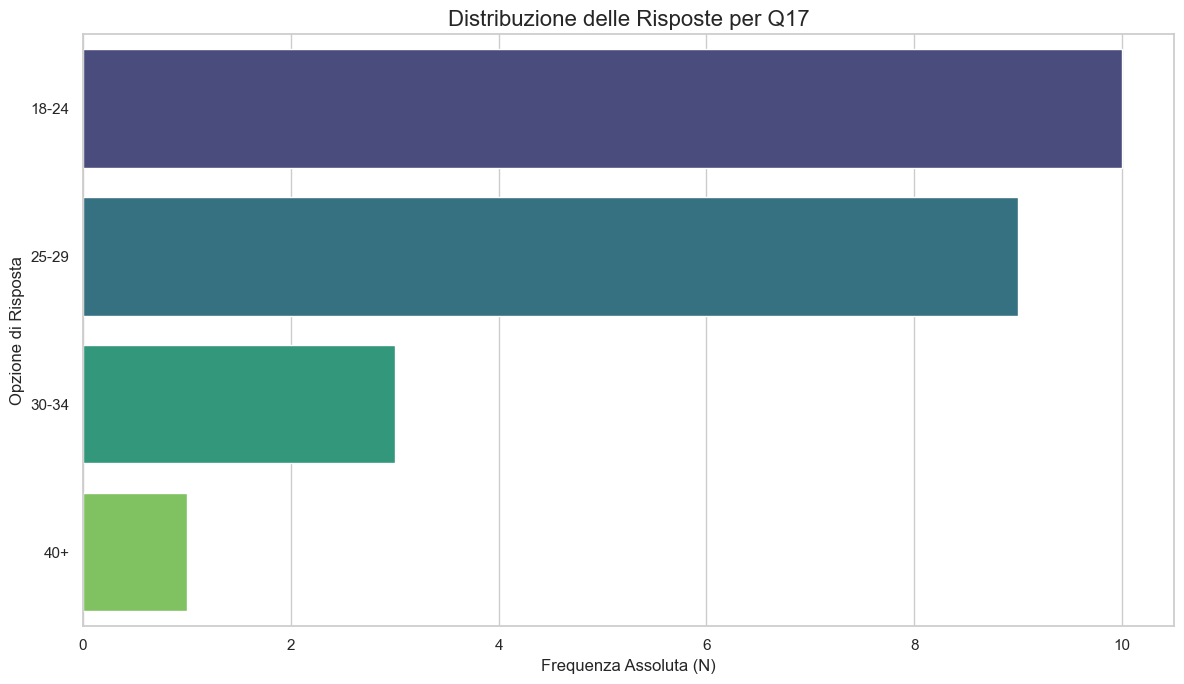

In [16]:
bar_plot("Q17")

C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


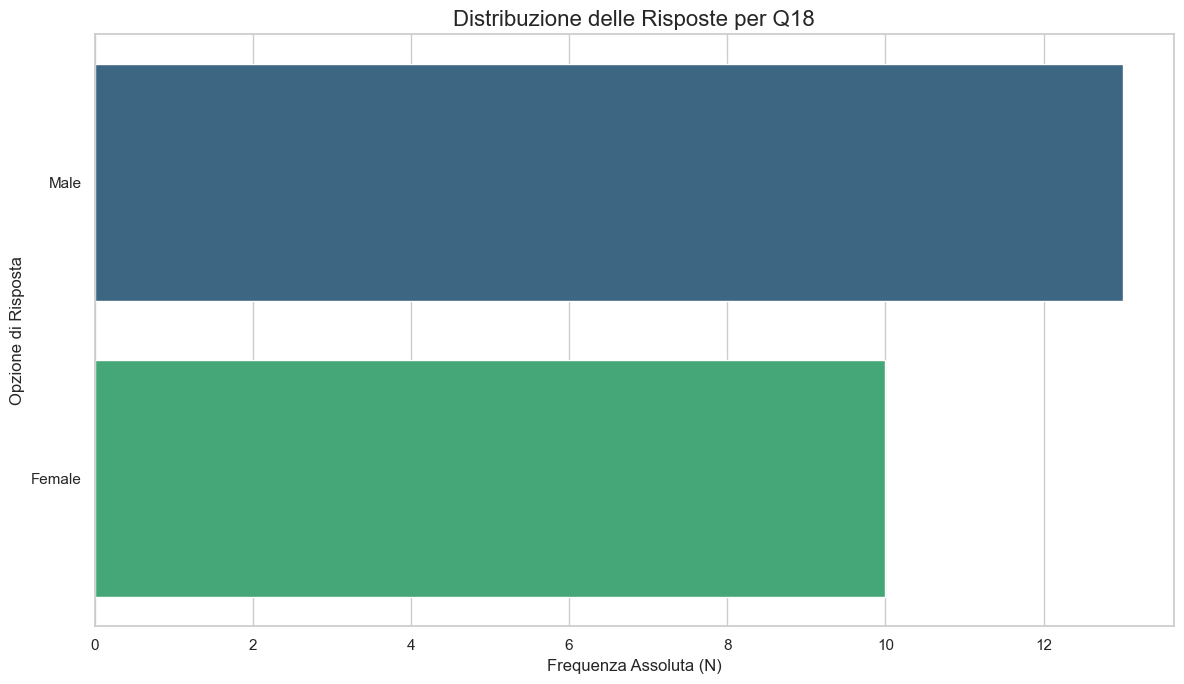

In [17]:
bar_plot("Q18")

In [18]:
merged_df["Q24"] = merged_df["Q24"].astype(str).str.strip().str.lower()

# b. Mappatura: Correzione di varianti ed errori di battitura
mapping = {
    'italia': 'italy',
    'italt': 'italy',
    # Aggiungi qui altre correzioni se necessario (es. 'romania ' -> 'romania')
}
merged_df['Q24'] = merged_df['Q24'].replace(mapping)

# c. Standardizzazione: Capitalizza per il formato finale ("Italy", "Romania")
merged_df['Q24'] = merged_df['Q24'].str.capitalize()

C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


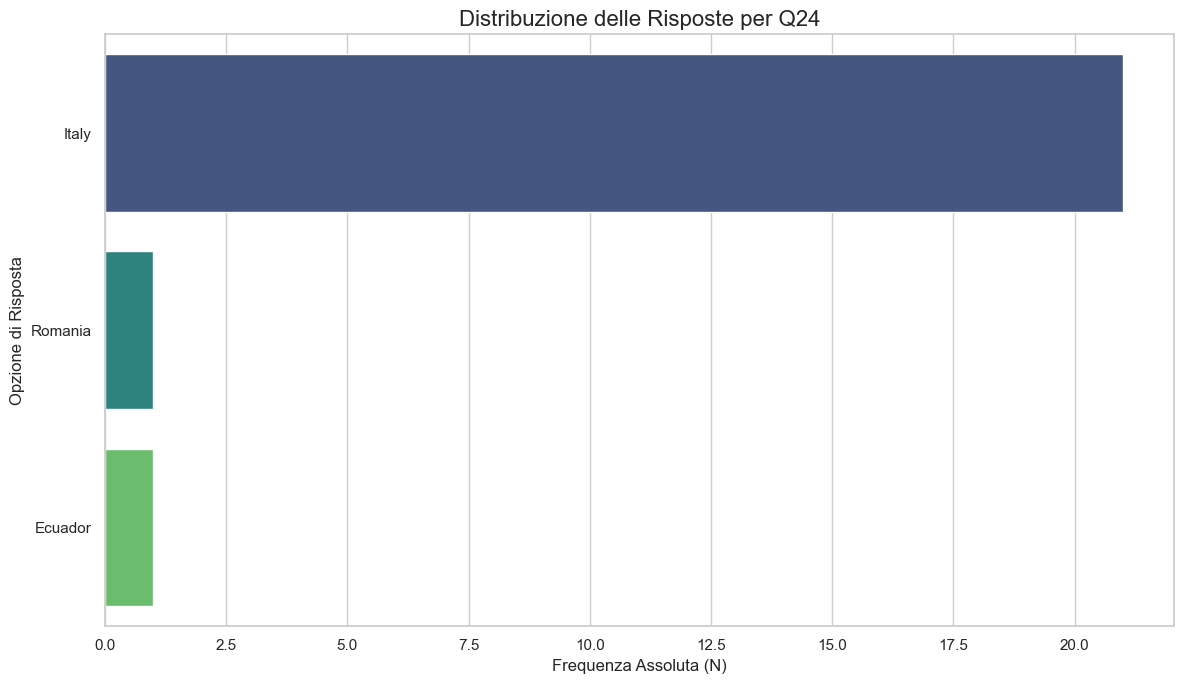

In [19]:
bar_plot("Q24")

C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


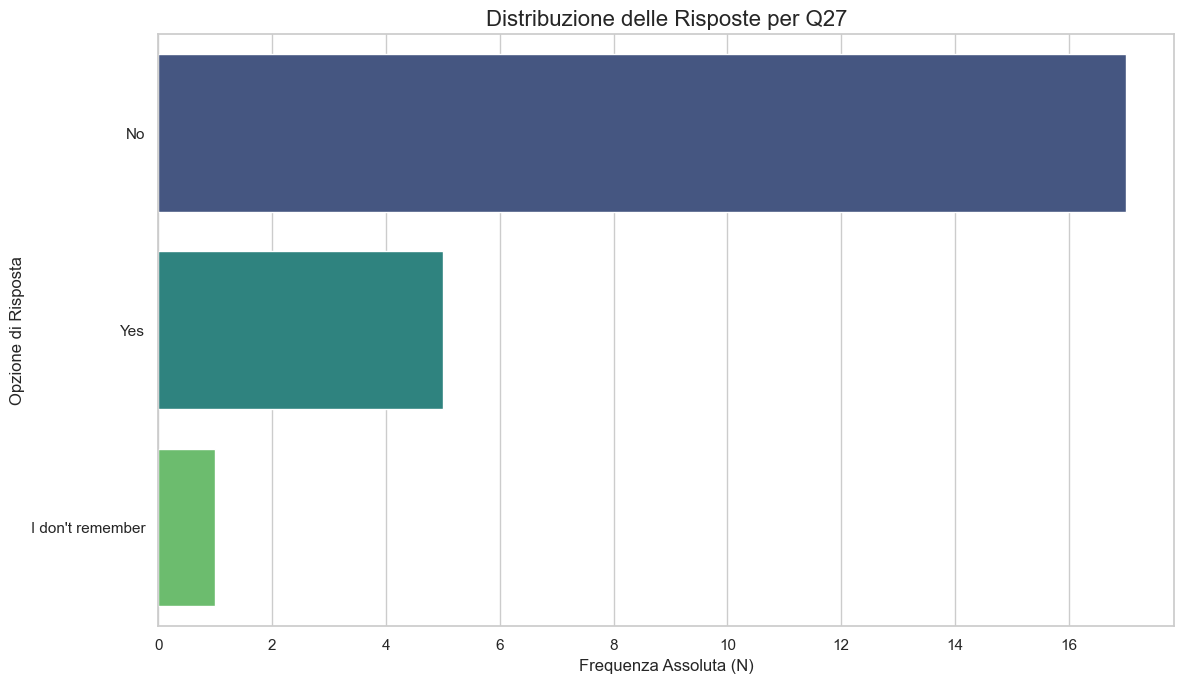

In [20]:
bar_plot("Q27")

C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


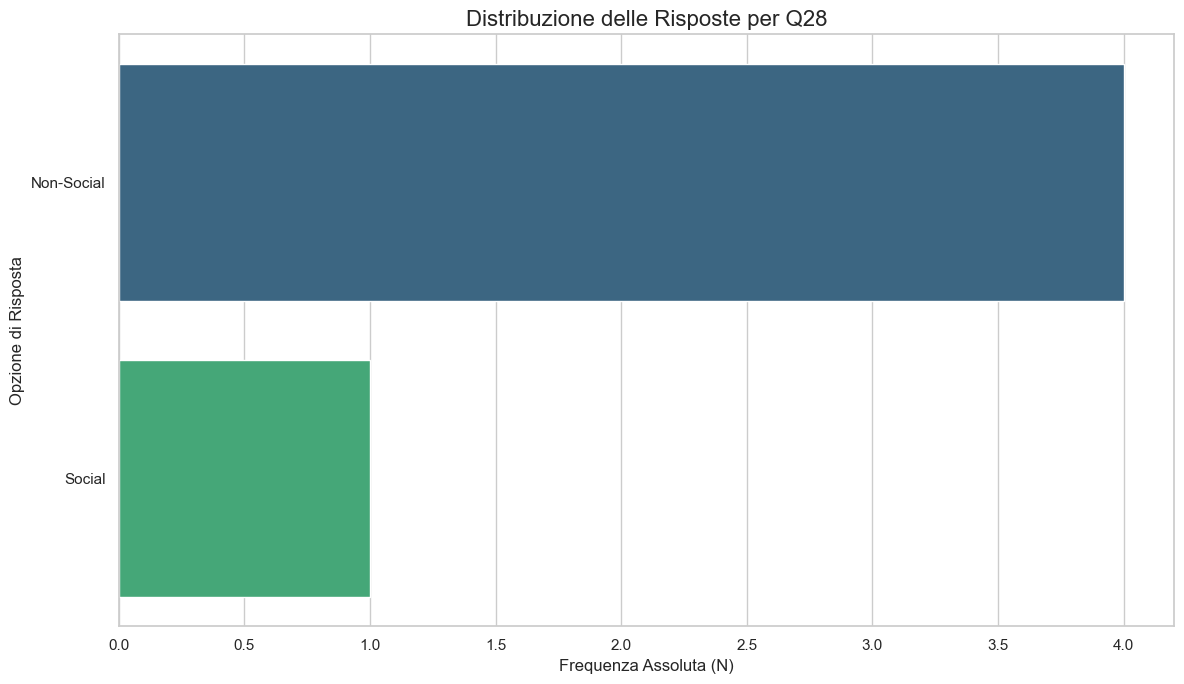

In [21]:
bar_plot("Q28")

In [22]:
import numpy as np

# === 1. Funzione per calcolare i punteggi OCEAN dai file raw ===
def calcola_OCEAN_da_raw(df):
    """
    Legge tutti i file Excel in una cartella, calcola i punteggi OCEAN (Big Five)
    a partire dalle 15 domande (Q29_1...Q29_15), e restituisce un DataFrame.
    """
    likert_scale = {
        "strongly disagree": 1,
        "disagree": 2,
        "somewhat disagree": 3,
        "neither agree nor disagree": 4,
        "somewhat agree": 5,
        "agree": 6,
        "strongly agree": 7
    }

    reverse_items = [3, 6, 10, 14]  # item da invertire (1-based)
    traits = {
        "neuroticism":        [1, 2, 3],
        "extroversion":       [4, 5, 6],
        "openness":           [7, 8, 9],
        "agreeableness":      [10, 11, 12],
        "conscientiousness":  [13, 14, 15],
    }

    ids = df["Q36"]

    # === Filtra solo le colonne delle 15 domande ===
    bfi_df = df.filter(regex="^Q29")

    # Prima riga = testo, quindi la scartiamo
    bfi_df = bfi_df.dropna(how="all").reset_index(drop=True)
    df = df.dropna(how="all").reset_index(drop=True)

    # === Mappa risposte testuali a Likert 1–7 ===
    bfi_df = bfi_df.map(lambda x: likert_scale.get(str(x).strip().lower(), None))

    # === Reverse scoring ===
    for i in reverse_items:
        col = f"Q29_{i}"
        if col in bfi_df.columns:
            bfi_df[col] = bfi_df[col].apply(lambda x: 8 - x if pd.notna(x) else x)

    # === Calcola media per ogni tratto ===
    bfi_scores = pd.DataFrame(index=bfi_df.index)
    for trait, indices in traits.items():
        cols = [f"Q29_{i}" for i in indices if f"Q29_{i}" in bfi_df.columns]
        bfi_scores[trait] = bfi_df[cols].mean(axis=1).round(1)

    final_df = pd.DataFrame(ids)
    final_df[["openness", "conscientiousness", "extroversion", "agreeableness", "neuroticism"]] = bfi_scores
        
    return final_df


In [23]:
scores = calcola_OCEAN_da_raw(merged_df)
scores

,Q36,openness,conscientiousness,extroversion,agreeableness,neuroticism
0,201,3.3,2.7,4.7,5.0,4.7
1,202,2.7,4.0,6.0,6.0,5.0
2,203,4.3,4.3,5.0,5.0,3.7
3,204,4.0,5.0,6.0,6.7,3.7
4,205,2.7,5.0,6.0,5.0,5.3
5,206,3.0,4.3,6.3,6.3,5.3
6,207,5.7,3.0,4.7,4.0,4.0
7,208,5.0,5.3,5.0,3.7,4.0
8,209,1.7,5.3,5.7,4.7,3.0
9,210,5.3,5.3,4.3,5.3,4.0


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Assicurati di importare pandas se non lo hai già fatto

# --- Funzione per generare i radar plot ---
def plotta_OCEAN(df, output_img="ocean_radar.png"):
    """
    Prende un DataFrame con colonne OCEAN e Q36 (ID partecipante),
    e genera radar plot con media gruppo + singoli partecipanti.
    """
    bfi_cols = ["openness", "conscientiousness", "extroversion", "agreeableness", "neuroticism"]
    df_bfi = df[bfi_cols].copy()
    if "Q36" in df.columns:
        df_bfi.index = df["Q36"]

    # Media del gruppo
    df_mean = df_bfi.mean(axis=0)

    # Setup radar plot
    labels = ["O", "C", "E", "A", "N"]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # SCELTA DELLA MAPPA DI COLORI HSV E GESTIONE DEL NUMERO DI COLORI
    colors_cmap = plt.colormaps.get_cmap("hsv") 
    
    # Questo è un valore arbitrario di quanti "salti" faremo nella mappa HSV
    # Possiamo calcolarlo in base al numero di partecipanti effettivi
    num_participants = len(df_bfi.index)
    
    # Genera un array di colori che sono ben distanziati lungo la mappa HSV
    # Si assicura che ci sia uno stacco visivo.
    # L'argomento `np.linspace(0, 1, num_participants, endpoint=False)` 
    # crea `num_participants` punti equidistanti tra 0 e 1, 
    # che vengono poi usati come input per la mappa `hsv`.
    # Questo darà colori distinti e distribuiti uniformemente lungo lo spettro.
    participant_colors = [colors_cmap(x) for x in np.linspace(0, 1, num_participants, endpoint=False)]


    rows, cols = 3, 8
    fig_width, fig_height = 16, 9
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height), subplot_kw=dict(polar=True))
    fig.suptitle("Profili di Personalità (OCEAN)", fontsize=24, y=1.03)
    axes = axes.flatten()

    # Plot dei partecipanti
    for i, participant in enumerate(df_bfi.index):
        if i >= len(axes):
            break
        ax = axes[i]

        # Media gruppo
        values_mean = df_mean.tolist() + [df_mean.tolist()[0]]
        ax.plot(angles, values_mean, color="gray", linestyle="dashed", linewidth=2, label="Media gruppo")
        ax.fill(angles, values_mean, color="gray", alpha=0.1)

        # Partecipante - USA IL COLORE PRE-GENERATO
        values_p = df_bfi.loc[participant].tolist() + [df_bfi.loc[participant].tolist()[0]]
        ax.plot(angles, values_p, color=participant_colors[i], linewidth=2) # <--- CAMBIAMENTO QUI
        ax.fill(angles, values_p, color=participant_colors[i], alpha=0.4) # <--- CAMBIAMENTO QUI

        # Stile
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_ylim(0, 7)
        ax.set_title(f"{participant}", size=14, pad=25)

    # Nascondi subplot vuoti
    for j in range(len(df_bfi.index), len(axes)):
        fig.delaxes(axes[j])

    # Legenda
    handles, labels_leg = ax.get_legend_handles_labels()
    fig.legend(handles, labels_leg, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.02), fontsize="large")

    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    fig.savefig(output_img, dpi=150, bbox_inches="tight")
    plt.close(fig)

    print(f"✅ Radar plot salvato in {output_img}")

In [25]:
plotta_OCEAN(scores)

✅ Radar plot salvato in ocean_radar.png


In [26]:
# Assumendo che il tuo DataFrame si chiami 'merged_df'

# 1. Definisci la mappatura dal testo ai numeri (adatta i testi se necessario!)
# Adatta queste chiavi (le risposte testuali) in base al tuo questionario.
# Ho usato esempi comuni, ma POTREBBERO ESSERE DIVERSI nel tuo merged_df.
text_to_num_map = {
    'Very slightly or not at all': 1,
    'A little': 2,
    'Moderately': 3,
    'Quite a bit': 4,
    'Extremely': 5
}

# Identifica tutte le colonne del PANAS (Q33 e Q12)
panas_cols = [col for col in merged_df.columns if col.startswith('Q33_') or col.startswith('Q12_')]

# Applica la mappatura a tutte le colonne PANAS
for col in panas_cols:
    # 'errors=\'coerce\'' trasformerà qualsiasi valore non trovato in NaN
    merged_df[col] = merged_df[col].replace(text_to_num_map)
    # Se i valori sono ancora stringhe dopo il replace (e.g., se ci sono spazi extra),
    # prova a usare .str.strip() prima del replace
    # merged_df[col] = merged_df[col].astype(str).str.strip().replace(text_to_num_map)

# !!! CONTROLLO CRITICO: Verificare che la conversione sia andata a buon fine
# Se questa riga mostra ancora dei valori testuali o molti NaN, la tua mappatura (text_to_num_map)
# non corrisponde esattamente ai valori nel tuo DataFrame.
print("Esempio dopo la mappatura (Q33_1):")
print(merged_df['Q33_1'].value_counts(dropna=False))

Esempio dopo la mappatura (Q33_1):
Q33_1
4    14
3     5
5     4
Name: count, dtype: int64


C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2139646306.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].replace(text_to_num_map)


In [27]:
# 2. Definisci gli item per l'Affetto Positivo (PA) e l'Affetto Negativo (NA)
pa_items = ['1', '3', '5', '9', '10', '12', '14', '16', '17', '19']
na_items = ['2', '4', '6', '7', '8', '11', '13', '15', '18', '20']

# --- CALCOLO AFFETTO POSITIVO (PA) ---
pa_pre_cols = ['Q33_' + item for item in pa_items]
merged_df['PA_Pre'] = merged_df[pa_pre_cols].sum(axis=1)

pa_post_cols = ['Q12_' + item for item in pa_items]
merged_df['PA_Post'] = merged_df[pa_post_cols].sum(axis=1)

# --- CALCOLO AFFETTO NEGATIVO (NA) ---
na_pre_cols = ['Q33_' + item for item in na_items]
merged_df['NA_Pre'] = merged_df[na_pre_cols].sum(axis=1)

na_post_cols = ['Q12_' + item for item in na_items]
merged_df['NA_Post'] = merged_df[na_post_cols].sum(axis=1)

print("\nCalcolo dei punteggi completato. Range atteso: 10-50.")


Calcolo dei punteggi completato. Range atteso: 10-50.


In [28]:
from scipy.stats import pearsonr

# 3. Calcolo delle Correlazioni

# Correlazione Affetto Positivo (PA)
corr_pa, p_value_pa = pearsonr(merged_df['PA_Pre'], merged_df['PA_Post'])

print("\n--- Correlazione Affetto Positivo (PA) ---")
print(f"Coefficiente di Correlazione (r): {corr_pa:.3f}")
print(f"Valore p (p-value): {p_value_pa:.3f}")

# Correlazione Affetto Negativo (NA)
corr_na, p_value_na = pearsonr(merged_df['NA_Pre'], merged_df['NA_Post'])

print("\n--- Correlazione Affetto Negativo (NA) ---")
print(f"Coefficiente di Correlazione (r): {corr_na:.3f}")
print(f"Valore p (p-value): {p_value_na:.3f}")


--- Correlazione Affetto Positivo (PA) ---
Coefficiente di Correlazione (r): 0.289
Valore p (p-value): 0.181

--- Correlazione Affetto Negativo (NA) ---
Coefficiente di Correlazione (r): -0.161
Valore p (p-value): 0.463


C:\Users\gabri\AppData\Local\Temp\ipykernel_8428\2014358884.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_for_plot = data_for_plot.stack(level=0).reset_index(names=['ID', 'Affect'])


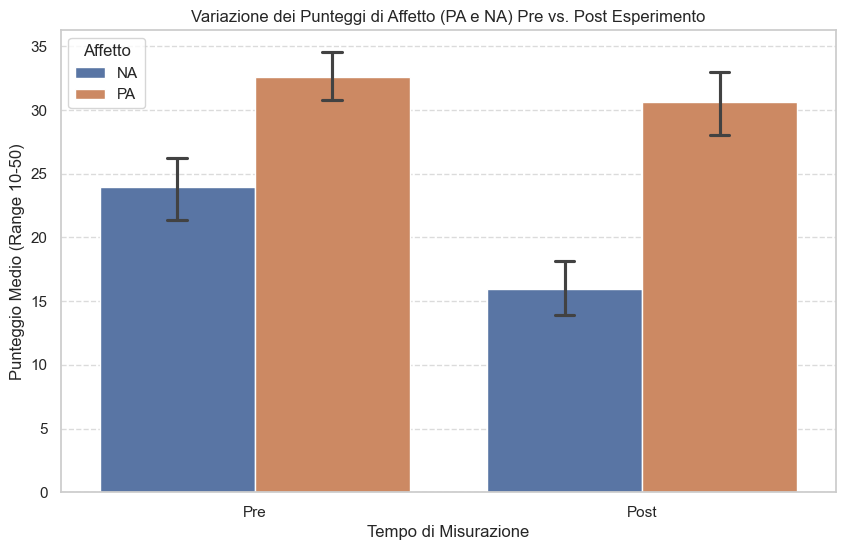

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format) ---

# Creazione di un DataFrame 'long' solo con i punteggi di interesse
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post']]

# Rinomina per il melt
data_for_plot.columns = pd.MultiIndex.from_tuples([
    ('PA', 'Pre'), ('PA', 'Post'), ('NA', 'Pre'), ('NA', 'Post')
])
data_for_plot = data_for_plot.stack(level=0).reset_index(names=['ID', 'Affect'])

# Melt finale per combinare Pre e Post in un'unica colonna
data_long = data_for_plot.melt(
    id_vars=['ID', 'Affect'],
    value_vars=['Pre', 'Post'],
    var_name='Time',
    value_name='Score'
)

# --- 2. CREAZIONE DEL GRAFICO (Bar Plot con Intervallo di Confidenza) ---

plt.figure(figsize=(10, 6))

# Creazione del Bar Plot: 'Time' sull'asse X, 'Score' sull'asse Y, separati per 'Affect'
sns.barplot(
    x='Time',
    y='Score',
    hue='Affect',
    data=data_long,
    errorbar='ci',  # Visualizza l'Intervallo di Confidenza al 95%
    capsize=0.1     # Dimensione dei tappi sulle barre di errore
)

plt.title('Variazione dei Punteggi di Affetto (PA e NA) Pre vs. Post Esperimento')
plt.xlabel('Tempo di Misurazione')
plt.ylabel('Punteggio Medio (Range 10-50)')
plt.legend(title='Affetto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 3. PROSSIMO PASSO: Test Statistico ---

# Dopo la visualizzazione, il passo cruciale è eseguire un Test t per Campioni Accoppiati
# (Paired Samples t-test) per confermare se le differenze visualizzate sono significative.

<Figure size 1200x600 with 0 Axes>

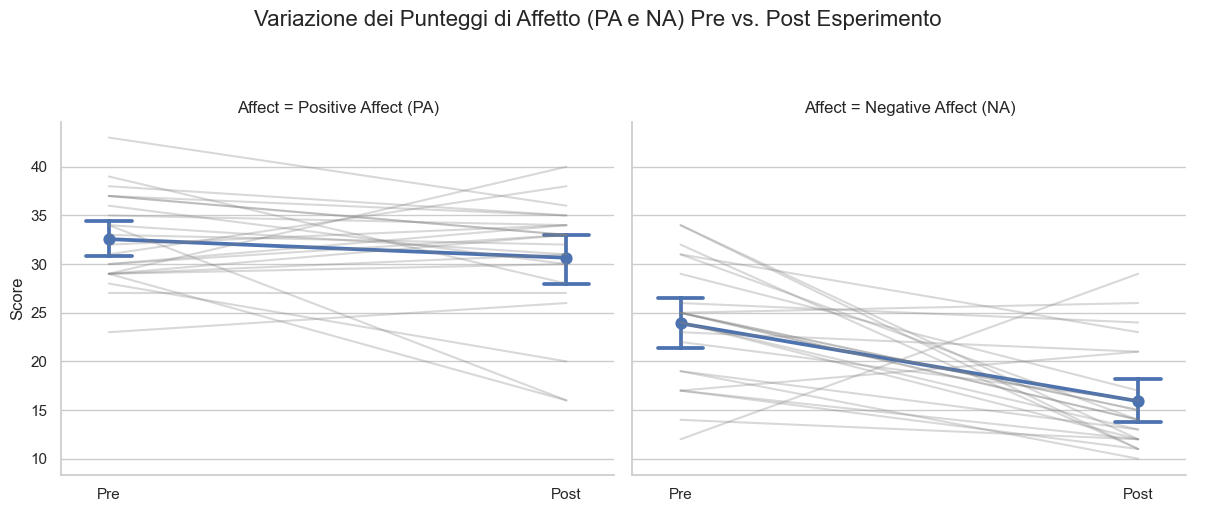

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format per il Plot) ---

# Prende solo le colonne dei punteggi calcolati
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post']].copy()

# Aggiunge un ID univoco per ogni partecipante, necessario per tracciare le linee
data_for_plot['ID'] = data_for_plot.index 

# Rinomina e impila i dati per l'Affetto Positivo (PA)
pa_long = data_for_plot[['ID', 'PA_Pre', 'PA_Post']].melt(
    id_vars='ID', 
    var_name='Time', 
    value_name='Score'
)
pa_long['Affect'] = 'Positive Affect (PA)'
pa_long['Time'] = pa_long['Time'].replace({'PA_Pre': 'Pre', 'PA_Post': 'Post'})

# Rinomina e impila i dati per l'Affetto Negativo (NA)
na_long = data_for_plot[['ID', 'NA_Pre', 'NA_Post']].melt(
    id_vars='ID', 
    var_name='Time', 
    value_name='Score'
)
na_long['Affect'] = 'Negative Affect (NA)'
na_long['Time'] = na_long['Time'].replace({'NA_Pre': 'Pre', 'NA_Post': 'Post'})

# Combina i due set di dati in un unico DataFrame 'long'
data_combined = pd.concat([pa_long, na_long])

# --- 2. CREAZIONE DEL PLOT ---

plt.figure(figsize=(12, 6))

# Dividi il grafico in due subplot: uno per PA e uno per NA
sns.catplot(
    data=data_combined,
    x='Time',
    y='Score',
    col='Affect',
    kind='point',  # Usa 'point' per mostrare la media e la barra di errore
    errorbar=('ci', 95), # Barra di errore come Intervallo di Confidenza al 95%
    capsize=0.1,
    height=5,
    aspect=1.2
)

# Aggiungi le linee individuali per mostrare la variazione accoppiata
for i, affect in enumerate(['Positive Affect (PA)', 'Negative Affect (NA)']):
    ax = plt.gcf().axes[i]
    # Filtra i dati per l'Affetto corrente
    subset = data_combined[data_combined['Affect'] == affect]
    
    # Disegna una linea per ogni ID (individuo)
    sns.lineplot(
        data=subset,
        x='Time',
        y='Score',
        units='ID',
        estimator=None, # Non calcolare la media, traccia linee individuali
        alpha=0.3,      # Rendi le linee individuali semi-trasparenti
        color='gray',
        ax=ax,
        legend=False
    )
    # Rimuovi l'etichetta dell'asse x del plot individuale per non sovrapporla
    ax.set_xlabel('') 

plt.suptitle('Variazione dei Punteggi di Affetto (PA e NA) Pre vs. Post Esperimento', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
# --- 3. TEST T PER CAMPIONI ACCOPPIATI (Paired Samples t-test) ---

print("\n--- Risultati del Test t per Campioni Accoppiati ---")

# a) Test t per Affetto Positivo (PA)
t_pa, p_pa = stats.ttest_rel(merged_df['PA_Pre'], merged_df['PA_Post'])

# b) Test t per Affetto Negativo (NA)
t_na, p_na = stats.ttest_rel(merged_df['NA_Pre'], merged_df['NA_Post'])

print("\nAffetto Positivo (PA):")
print(f"  Media PA_Pre: {merged_df['PA_Pre'].mean():.2f}")
print(f"  Media PA_Post: {merged_df['PA_Post'].mean():.2f}")
print(f"  T-statistic (t): {t_pa:.3f}")
print(f"  Valore p (p-value): {p_pa:.3f}")

print("\nAffetto Negativo (NA):")
print(f"  Media NA_Pre: {merged_df['NA_Pre'].mean():.2f}")
print(f"  Media NA_Post: {merged_df['NA_Post'].mean():.2f}")
print(f"  T-statistic (t): {t_na:.5f}")
print(f"  Valore p (p-value): {p_na:.5f}")


--- Risultati del Test t per Campioni Accoppiati ---

Affetto Positivo (PA):
  Media PA_Pre: 32.57
  Media PA_Post: 30.65
  T-statistic (t): 1.386
  Valore p (p-value): 0.180

Affetto Negativo (NA):
  Media NA_Pre: 23.91
  Media NA_Post: 15.91
  T-statistic (t): 4.34164
  Valore p (p-value): 0.00026


In [32]:
import pandas as pd

# Assumendo che il tuo DataFrame si chiami 'merged_df' e contenga 'NA_Pre' e 'NA_Post'

# Calcola il punteggio di differenza (Variazione)
merged_df['NA_Difference'] = merged_df['NA_Post'] - merged_df['NA_Pre']

print("Prime 5 righe del DataFrame con la variazione NA:")
print(merged_df[['NA_Pre', 'NA_Post', 'NA_Difference']])

Prime 5 righe del DataFrame con la variazione NA:
    NA_Pre  NA_Post  NA_Difference
0       14       12             -2
1       22       16             -6
2       31       23             -8
3       19       13             -6
4       17       12             -5
5       25       15            -10
6       25       14            -11
7       25       26              1
8       23       21             -2
9       25       14            -11
10      25       15            -10
11      32       11            -21
12      34       12            -22
13      34       11            -23
14      29       17            -12
15      19       10             -9
16      31       14            -17
17      26       24             -2
18      17       11             -6
19      24       12            -12
20      12       29             17
21      17       21              4
22      24       13            -11


In [33]:
# Ordina il DataFrame in base alla colonna 'NA_Difference' in ordine decrescente
# (i valori positivi più grandi, che indicano il maggior aumento, saranno in cima)
merged_df_sorted = merged_df.sort_values(by='NA_Difference', ascending=False)

# Prende il partecipante che ha avuto l'aumento più significativo
outlier_increase = merged_df_sorted.iloc[0]

# --- Risultato ---
print("\n--- Partecipante con il Maggiore Aumento di Affetto Negativo (NA) ---")
print(f"ID Partecipante (Indice del DataFrame): {outlier_increase.name}")
print(f"NA Pre-Esperimento: {outlier_increase['NA_Pre']}")
print(f"NA Post-Esperimento: {outlier_increase['NA_Post']}")
print(f"Variazione Totale (Post - Pre): {outlier_increase['NA_Difference']}")

# Se l'indice non è significativo, puoi provare a trovare una colonna 'ID_Partecipante'
# che identifichi meglio il soggetto se presente nel tuo merged_df:
# print(f"ID Partecipante (colonna specifica): {outlier_increase['ID_Partecipante']}")


--- Partecipante con il Maggiore Aumento di Affetto Negativo (NA) ---
ID Partecipante (Indice del DataFrame): 20
NA Pre-Esperimento: 12
NA Post-Esperimento: 29
Variazione Totale (Post - Pre): 17


In [34]:
merged_df.iloc[20]["Q36"] # A LOLLOOOOOOOOOOO 

'225'

In [35]:
import pandas as pd
from scipy import stats

# Assumendo che il tuo DataFrame si chiami 'merged_df'

# Calcola le colonne di Variazione (Delta) se non sono già presenti
# Un valore positivo significa aumento, un valore negativo significa diminuzione
if 'PA_Difference' not in merged_df.columns:
    merged_df['PA_Difference'] = merged_df['PA_Post'] - merged_df['PA_Pre']

if 'NA_Difference' not in merged_df.columns:
    merged_df['NA_Difference'] = merged_df['NA_Post'] - merged_df['NA_Pre']

# Suddividi i dati in base al gruppo "Personalizzato"
gruppo_si = merged_df[merged_df['Personalizzato'] == 'SI']
gruppo_no = merged_df[merged_df['Personalizzato'] == 'NO']

print(f"Dimensione Gruppo 'SI': {len(gruppo_si)} | Dimensione Gruppo 'NO': {len(gruppo_no)}")

Dimensione Gruppo 'SI': 10 | Dimensione Gruppo 'NO': 13


In [36]:
t_pa_diff, p_pa_diff = stats.ttest_ind(gruppo_si['PA_Difference'], gruppo_no['PA_Difference'], equal_var=True)

print("\n--- Confronto Variazione Affetto Positivo (Delta PA) ---")
print(f"Media Delta PA ('SI' Personalizzato): {gruppo_si['PA_Difference'].mean():.2f}")
print(f"Media Delta PA ('NO' Controllo): {gruppo_no['PA_Difference'].mean():.2f}")
print(f"T-statistic (t): {t_pa_diff:.3f}")
print(f"Valore p (p-value): {p_pa_diff:.3f}")


--- Confronto Variazione Affetto Positivo (Delta PA) ---
Media Delta PA ('SI' Personalizzato): -2.00
Media Delta PA ('NO' Controllo): -1.85
T-statistic (t): -0.054
Valore p (p-value): 0.957


In [37]:
t_na_diff, p_na_diff = stats.ttest_ind(gruppo_si['NA_Difference'], gruppo_no['NA_Difference'], equal_var=True)

print("\n--- Confronto Variazione Affetto Negativo (Delta NA) ---")
print(f"Media Delta NA ('SI' Personalizzato): {gruppo_si['NA_Difference'].mean():.2f}")
print(f"Media Delta NA ('NO' Controllo): {gruppo_no['NA_Difference'].mean():.2f}")
print(f"T-statistic (t): {t_na_diff:.3f}")
print(f"Valore p (p-value): {p_na_diff:.3f}")


--- Confronto Variazione Affetto Negativo (Delta NA) ---
Media Delta NA ('SI' Personalizzato): -13.40
Media Delta NA ('NO' Controllo): -3.85
T-statistic (t): -3.002
Valore p (p-value): 0.007


In [38]:
import numpy as np
import pandas as pd
from scipy import stats

# --- 1. DATI DEI GRUPPI (Basati sui tuoi risultati e N=23) ---

# Assunzione sulla dimensione dei sottogruppi (da confermare con i tuoi dati reali)
N_SI = len(merged_df[merged_df['Personalizzato'] == 'SI'])
N_NO = len(merged_df[merged_df['Personalizzato'] == 'NO'])

# Risultati del T-Test indipendente (da te forniti)
t_stat = -3.002
mean_diff_SI = -13.40  # Media Delta NA per 'SI'
mean_diff_NO = -3.85   # Media Delta NA per 'NO'

# --- 2. CALCOLO DELLA D DI COHEN (Formule basate su t-stat) ---

# Calcola la d di Cohen: misura l'Effect Size
# Formula: d = t * sqrt((N1 + N2) / (N1 * N2))
d_cohen = t_stat * np.sqrt((N_SI + N_NO) / (N_SI * N_NO))

# --- 3. RISULTATI ---

print("--- Analisi dell'Effect Size (Influenza della Personalizzazione) ---")
print(f"Dimensione Gruppo SI (Personalizzato): N={N_SI}")
print(f"Dimensione Gruppo NO (Controllo): N={N_NO}")
print("-" * 50)
print(f"La Media della Variazione (riduzione) di NA per SI è stata di: {mean_diff_SI:.2f}")
print(f"La Media della Variazione (riduzione) di NA per NO è stata di: {mean_diff_NO:.2f}")
print(f"La differenza tra i due gruppi è di: {mean_diff_SI - mean_diff_NO:.2f} punti.")
print("-" * 50)
print(f"d di Cohen (Effect Size): {d_cohen:.3f}")

# Interpretazione dell'Effect Size (Standard)
if abs(d_cohen) >= 0.8:
    interpretazione = "MOLTO GRANDE (Strong)"
elif abs(d_cohen) >= 0.5:
    interpretazione = "Medio (Moderate)"
elif abs(d_cohen) >= 0.2:
    interpretazione = "Piccolo (Small)"
else:
    interpretazione = "Trascurabile (Negligible)"

print(f"Interpretazione dell'Effect Size: {interpretazione}")

--- Analisi dell'Effect Size (Influenza della Personalizzazione) ---
Dimensione Gruppo SI (Personalizzato): N=10
Dimensione Gruppo NO (Controllo): N=13
--------------------------------------------------
La Media della Variazione (riduzione) di NA per SI è stata di: -13.40
La Media della Variazione (riduzione) di NA per NO è stata di: -3.85
La differenza tra i due gruppi è di: -9.55 punti.
--------------------------------------------------
d di Cohen (Effect Size): -1.263
Interpretazione dell'Effect Size: MOLTO GRANDE (Strong)
